In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile
from pathlib import Path

def display_tiff_panels(
    img8: np.ndarray,
    subset: tuple[int,int,int,int] = (0, 5000, 0, 5000),
    threshold: int | None = None,
    save_to: str | Path | None = None,
    downsample: int = 20
):
    """
    Display an in-memory uint8 image in two panels for quick threshold testing.

    Parameters
    ----------
    img8 : np.ndarray
        2D uint8 array (values 0–255).
    subset : (y0, y1, x0, x1)
        Zoom region for the right panel.
    threshold : int, optional
        If provided, applies (img8 > threshold) → 0/255 mask.
    save_to : str or Path, optional
        If provided when threshold is set, saves the masked subset as a new TIFF.
    downsample : int
        Factor to stride-sample the full image for the left thumbnail.
    """
    y0, y1, x0, x1 = subset

    # 1) make a thumbnail of the full image
    thumb = img8[::downsample, ::downsample]

    # 2) grab the full-resolution subset
    sub = img8[y0:y1, x0:x1]

    # 3) apply threshold if requested
    if threshold is not None:
        # binary mask → 0 or 255
        thumb_disp = (thumb > (threshold*255)).astype(np.uint8) * 255
        sub_disp   = (sub   > (threshold*255)).astype(np.uint8) * 255

        if save_to is not None:
            save_path = Path(save_to)
            save_path.parent.mkdir(parents=True, exist_ok=True)
            write_img = (img8 > (threshold*255)).astype(np.uint8) * 255
            tifffile.imwrite(str(save_path), write_img)
    else:
        thumb_disp = thumb
        sub_disp   = sub

    # 4) plot side-by-side
    fig, (ax_full, ax_sub) = plt.subplots(1, 2, figsize=(12, 6))
    ax_full.imshow(thumb_disp, cmap='gray', aspect='auto')
    ax_full.set_title(f"Full (1/{downsample} thumbnail)")
    ax_full.axis('off')

    ax_sub.imshow(sub_disp, cmap='gray', aspect='auto')
    title = (
        f"{'Mask' if threshold is not None else 'Subset'} "
        f"[{y0}:{y1}, {x0}:{x1}]"
    )
    ax_sub.set_title(title)
    ax_sub.axis('off')

    plt.tight_layout()
    plt.show()

#


25-0073_5nm_Region12_bsd.tif


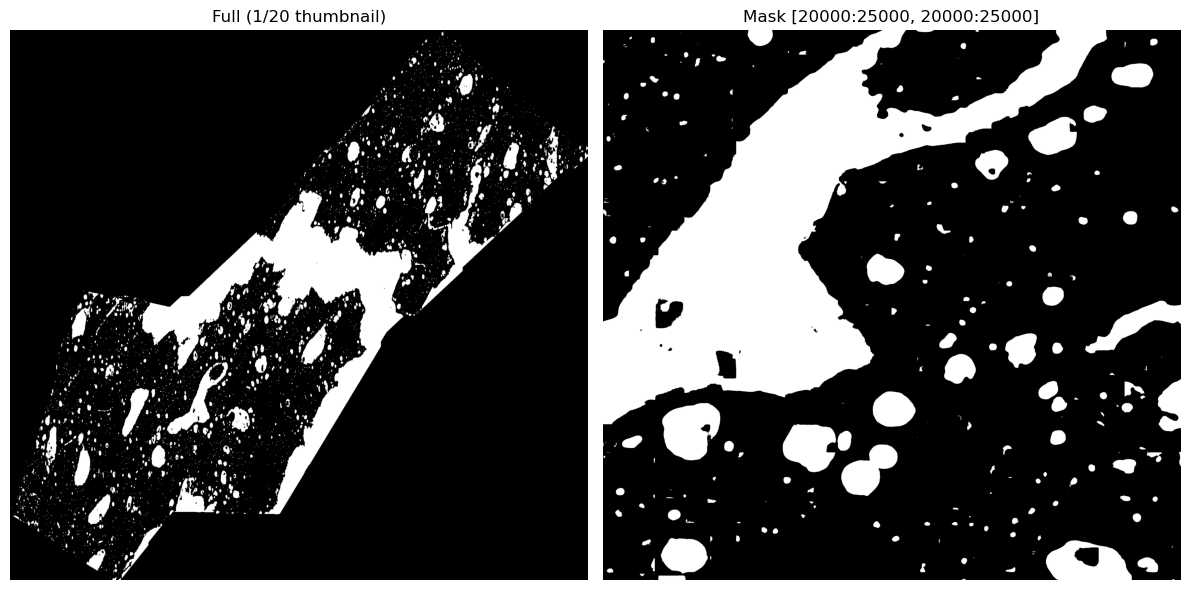

25-0075_5nm_Region11_bsd.tif


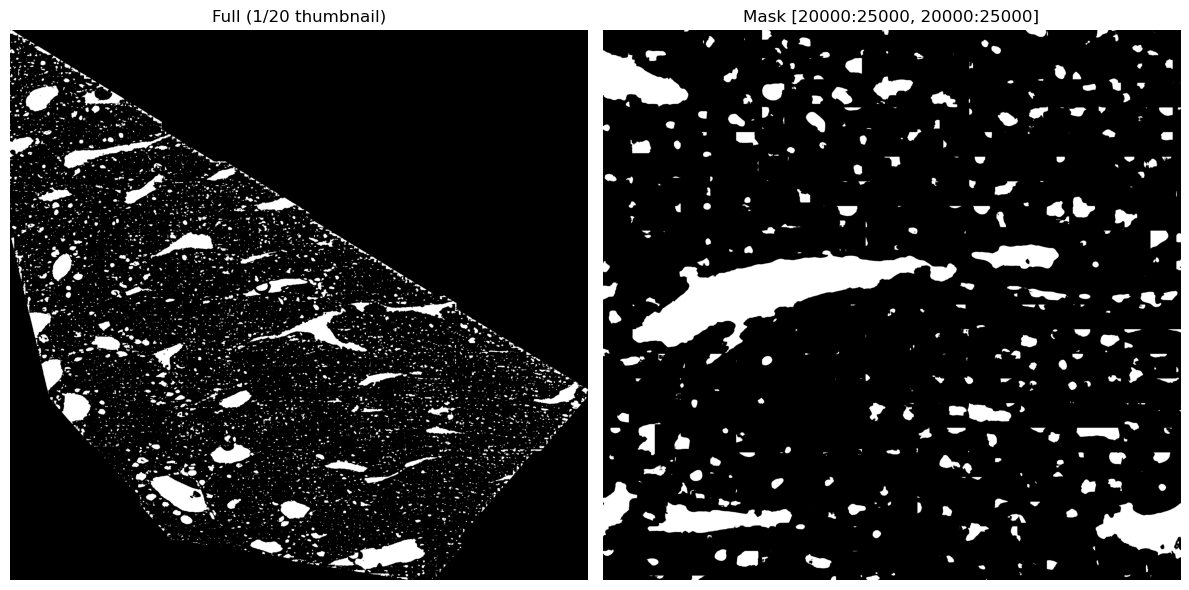

25-0077_5nm_R11_bsd.tif


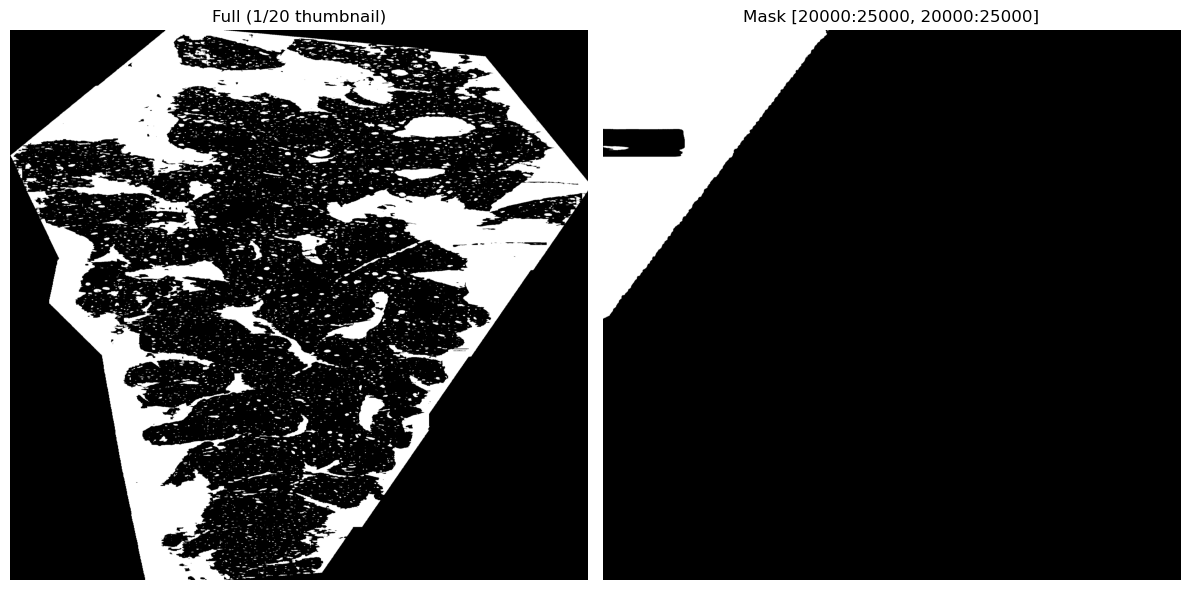

25-0079_5nm_R10_bsd.tif


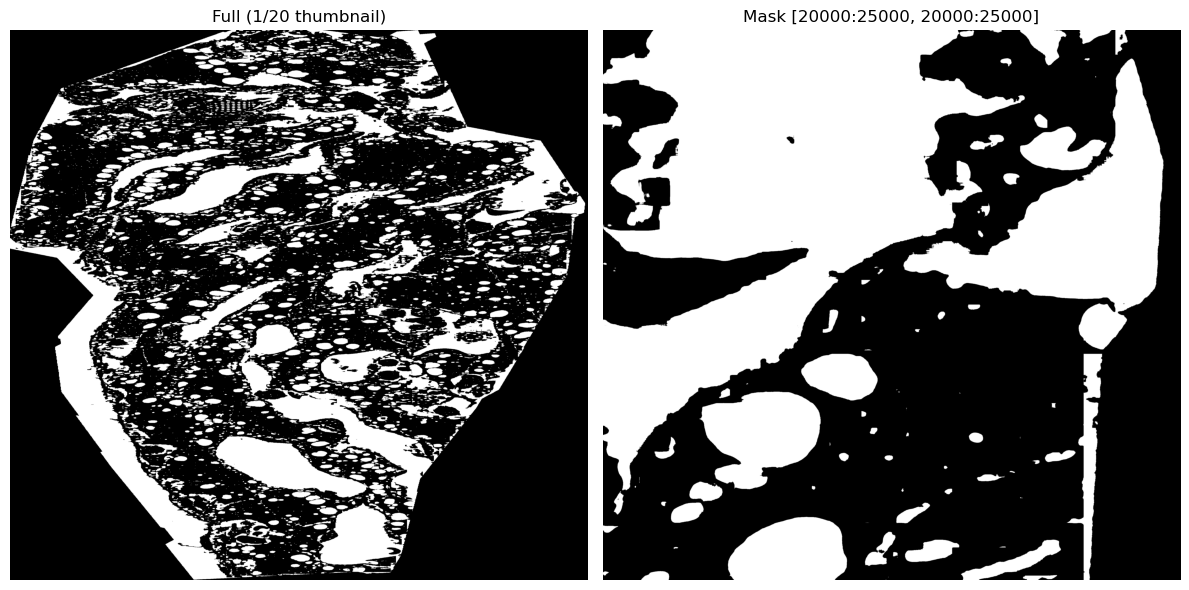

25-0081_5nm_R13_bsd.tif


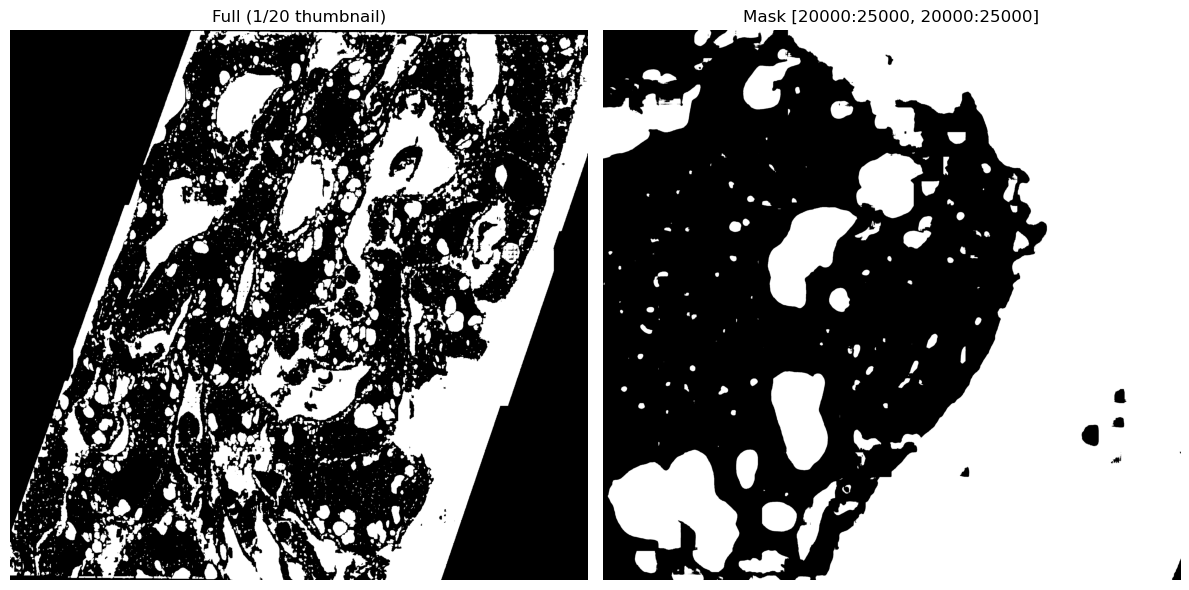

25-0081_5nm_R7_bsd.tif


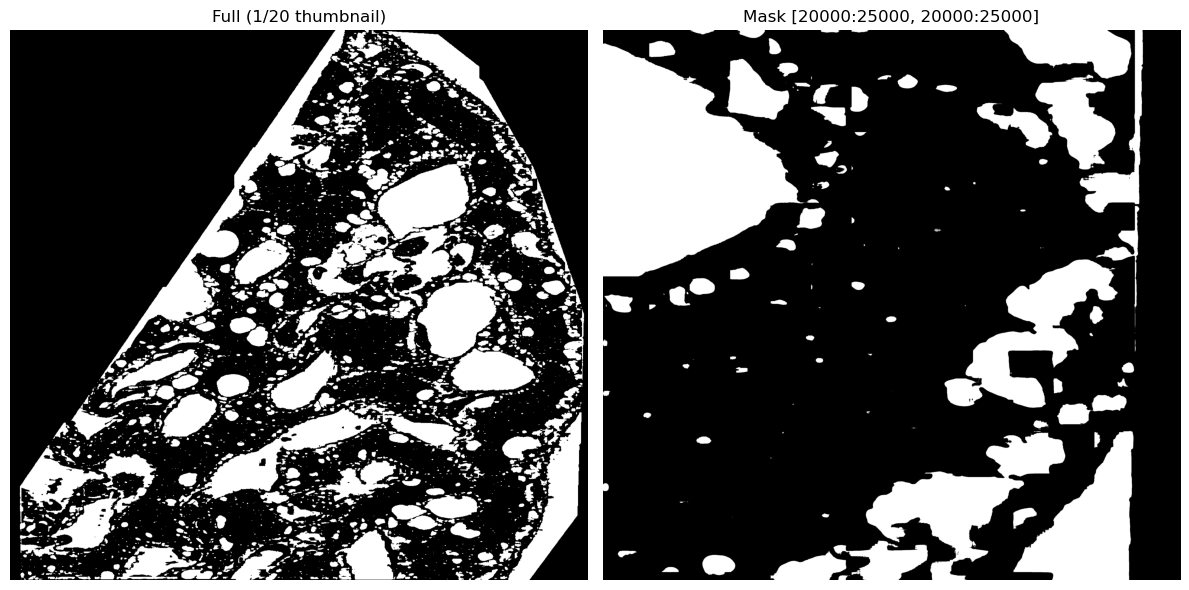

25-0083_5nm_R14_bsd.tif


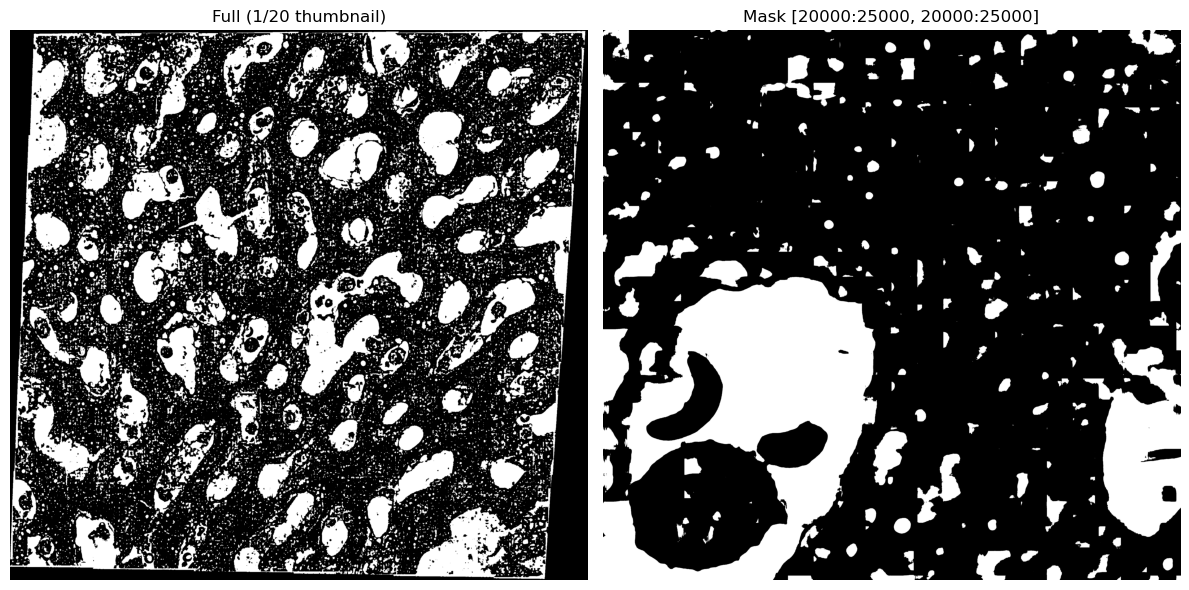

25-0085_5nm_Region13_bsd.tif


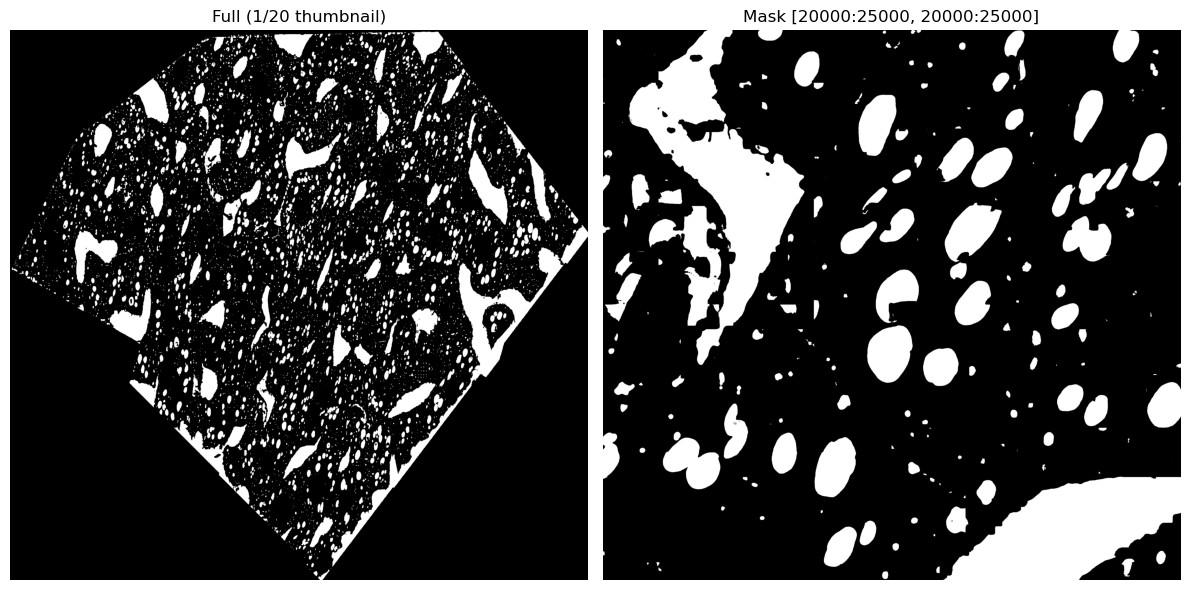

25-0087_5nm_Region17_bsd.tif


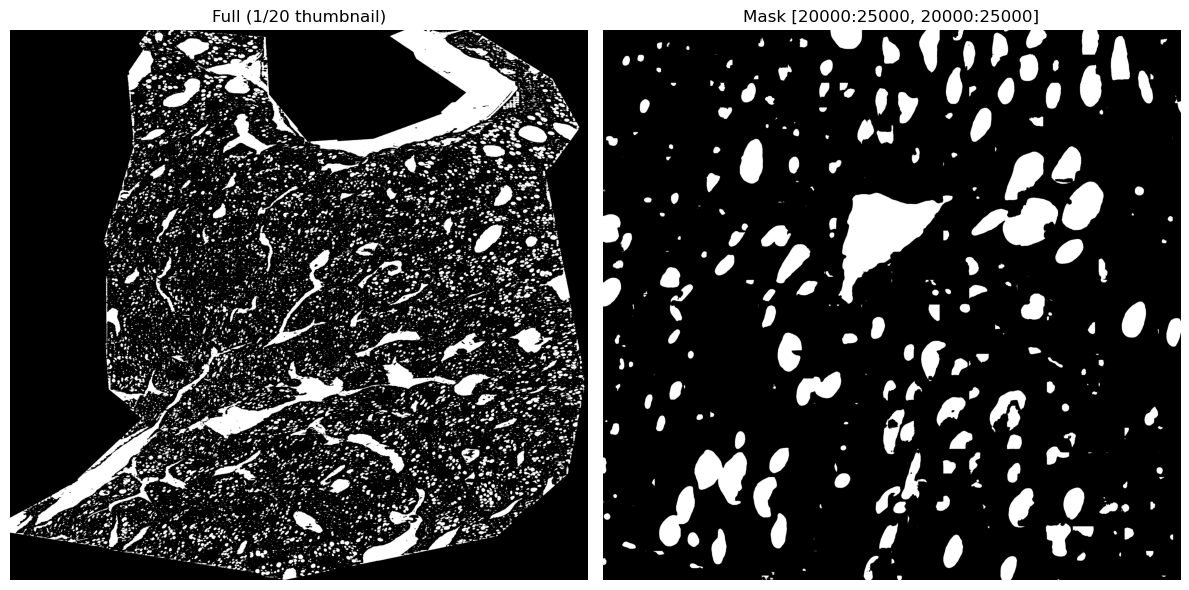

25-0089_5nm_Region15_bsd.tif


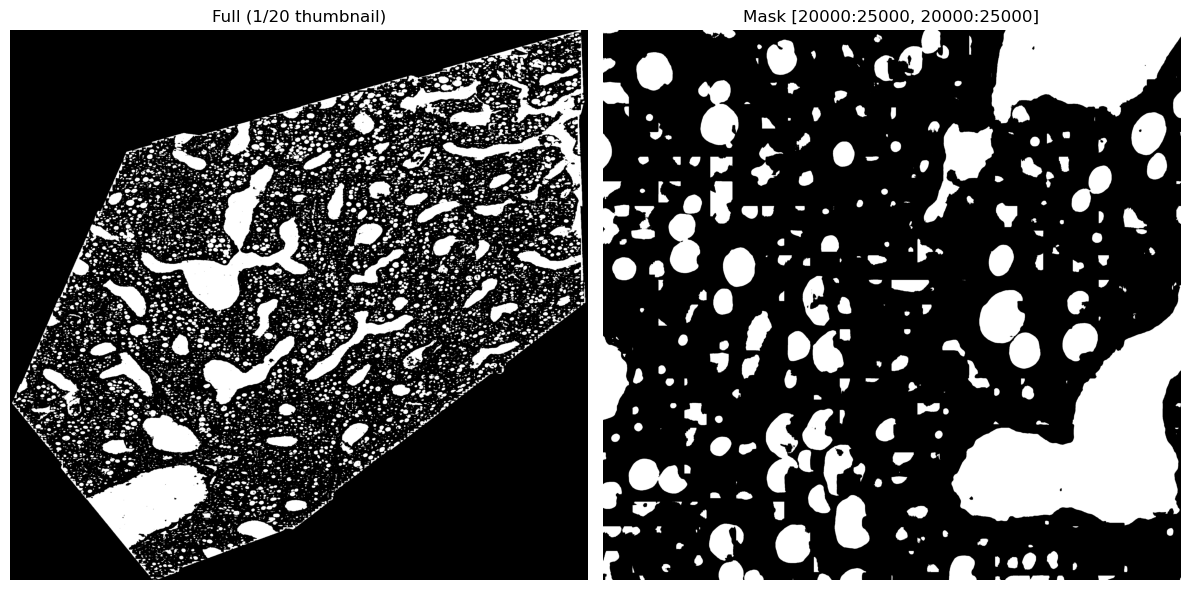

In [10]:
import tifffile
from pathlib import Path

fns = Path("/Volumes/Chris_SSD/lds_20250625_8bit").glob("*.tif")
i = 0
for fn in fns:
    print(fn.name.split("/")[-1])
    img = tifffile.imread(str(fn))
    i += 1
    save_to = f"/Volumes/Chris_SSD/ImmunoEM-Analysis/lds-binary/{fn.name.split('/')[-1]}"
    display_tiff_panels(img, subset=(20000,25000,20000,25000), threshold=0.99, save_to=save_to)